# This tutorial shows how to build an atlas from a list of AnnData datasets. 

Integration is essential in single-cell analysis, as it combines a pile of datasets to provide an in-depth profiling of cell states within a single biological context. 

Assembly, in contrast, seeks to merge cell atlases from various contexts, expanding the scope of cell state landscape. 

These two approaches differ significantly in their computational settings. Integration often involves datasets with similar cell type compositions, while assembly can accommodate datasets with diverse cell type compositions.

This tutorial gives an example of building an assembled atlas using datasets from different species. 


In [1]:
import scanpy as sc 
import pandas as pd
import numpy as np
import umap 

from SURE.assembly import SingleOmicsAtlas

import torch 
torch.set_float32_matmul_precision("high")


/home/oem/anaconda3/envs/pyro/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2024-11-08 00:59:25.398536: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-08 00:59:25.646240: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 00:59:25.879836: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 00:59:25.947382: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been 

## Download and load datasets

We use the cortex datasets of Human, Gorilla, Chimpanzee, Macaque, and Marmoset to demonstrate the construction of a cross-species cortex atlas. The original datasets can be accessed [here](https://cellxgene.cziscience.com/collections/4dca242c-d302-4dba-a68f-4c61e7bad553).


In [10]:
# Human
adata1 = sc.read_h5ad('/media/oem/UB20_DATA/Workspace/Tutorial/tutorial_7/b9103b10-e021-4c20-9714-60b32928179e.h5ad')
adata1 = adata1.raw.to_adata()
adata1.var_names = adata1.var['feature_name'].tolist()
adata1.var_names_make_unique()
adata1.layers['counts'] = adata1.X.copy()

# Gorilla
adata2 = sc.read_h5ad('/media/oem/UB20_DATA/Workspace/Tutorial/tutorial_7/cbd3ea91-447b-460e-958c-720e578ced34.h5ad')
adata2 = adata2.raw.to_adata()
adata2.var_names = adata2.var['feature_name'].tolist()
adata2.var_names_make_unique()
adata2.layers['counts'] = adata2.X.copy()

# Chimpanzee
adata3 = sc.read_h5ad('/media/oem/UB20_DATA/Workspace/Tutorial/tutorial_7/810400dc-900b-4188-9972-07e9c91d56ea.h5ad')
adata3 = adata3.raw.to_adata()
adata3.var_names = adata3.var['feature_name'].tolist()
adata3.var_names_make_unique()
adata3.layers['counts'] = adata3.X.copy()

# Macaque
adata4 = sc.read_h5ad('/media/oem/UB20_DATA/Workspace/Tutorial/tutorial_7/09ced0da-2f4f-4a1e-a18a-31d49c38f3ff.h5ad')
adata4 = adata4.raw.to_adata()
adata4.var_names = adata4.var['feature_name'].tolist()
adata4.var_names_make_unique()
adata4.layers['counts'] = adata4.X.copy()

# Marmoset
adata5 = sc.read_h5ad('/media/oem/UB20_DATA/Workspace/Tutorial/tutorial_7/891852fb-9ff5-4071-a107-6c859ec0da50.h5ad')
adata5 = adata5.raw.to_adata()
adata5.var_names = adata5.var['feature_name'].tolist()
adata5.var_names_make_unique()
adata5.layers['counts'] = adata5.X.copy()


In [16]:
genes = list(set(adata1.var_names.tolist()) & \
    set(adata2.var_names.tolist()) & \
    set(adata3.var_names.tolist()) & \
    set(adata4.var_names.tolist()) & \
    set(adata5.var_names.tolist()))

adata1 = adata1[:, genes]
adata2 = adata2[:, genes]
adata3 = adata3[:, genes]
adata4 = adata4[:, genes]
adata5 = adata5[:, genes]

## Create a SingleOmicsAtlas

In [17]:
atlas = SingleOmicsAtlas('cross-species')
atlas.fit([adata1, adata2, adata3, adata4, adata5], batch_key='donor_id')

Create A Distribution-Preserved Single-Cell Omics Atlas
5 adata datasets are given
Adata 1 / 5: Preprocessing
Adata 2 / 5: Preprocessing
Adata 3 / 5: Preprocessing
Adata 4 / 5: Preprocessing
Adata 5 / 5: Preprocessing
Adata 1 / 5: Find 5000 HVGs
Adata 2 / 5: Find 5000 HVGs
Adata 3 / 5: Find 5000 HVGs
Adata 4 / 5: Find 5000 HVGs
Adata 5 / 5: Find 5000 HVGs
5000 common HVGs are found
Adata 1 / 5: Compute distribution-preserved sketching with 500 metacells
CUDA_VISIBLE_DEVICES=0 SURE --data-file "/tmp/tmp2qq4wjry/temp_counts_0.txt.gz" --undesired-factor-file
    "/tmp/tmp2qq4wjry/temp_uwv_0.txt.gz" --seed 0 --cuda --jit -lr 0.0001 -n 200 -bs 512 -cs 500 -likeli negbinomial
    -dirichlet -zi exact --save-model "/tmp/tmp2qq4wjry/temp_0.pth"


100%|██████████| 153/153 [00:00<00:00, 256.08batch/s]


Model saved to /tmp/tmp2qq4wjry/temp_0.pth
Model loaded from /tmp/tmp2qq4wjry/temp_0.pth
Adata 2 / 5: Compute distribution-preserved sketching with 500 metacells
CUDA_VISIBLE_DEVICES=0 SURE --data-file "/tmp/tmp2qq4wjry/temp_counts_1.txt.gz" --undesired-factor-file
    "/tmp/tmp2qq4wjry/temp_uwv_1.txt.gz" --seed 0 --cuda --jit -lr 0.0001 -n 200 -bs 512 -cs 500 -likeli negbinomial
    -dirichlet -zi exact --save-model "/tmp/tmp2qq4wjry/temp_1.pth"


100%|██████████| 137/137 [00:00<00:00, 283.33batch/s]


Model saved to /tmp/tmp2qq4wjry/temp_1.pth
Model loaded from /tmp/tmp2qq4wjry/temp_1.pth
Adata 3 / 5: Compute distribution-preserved sketching with 500 metacells
CUDA_VISIBLE_DEVICES=0 SURE --data-file "/tmp/tmp2qq4wjry/temp_counts_2.txt.gz" --undesired-factor-file
    "/tmp/tmp2qq4wjry/temp_uwv_2.txt.gz" --seed 0 --cuda --jit -lr 0.0001 -n 200 -bs 512 -cs 500 -likeli negbinomial
    -dirichlet -zi exact --save-model "/tmp/tmp2qq4wjry/temp_2.pth"


100%|██████████| 111/111 [00:00<00:00, 246.13batch/s]


Model saved to /tmp/tmp2qq4wjry/temp_2.pth
Model loaded from /tmp/tmp2qq4wjry/temp_2.pth
Adata 4 / 5: Compute distribution-preserved sketching with 500 metacells
CUDA_VISIBLE_DEVICES=0 SURE --data-file "/tmp/tmp2qq4wjry/temp_counts_3.txt.gz" --undesired-factor-file
    "/tmp/tmp2qq4wjry/temp_uwv_3.txt.gz" --seed 0 --cuda --jit -lr 0.0001 -n 200 -bs 512 -cs 500 -likeli negbinomial
    -dirichlet -zi exact --save-model "/tmp/tmp2qq4wjry/temp_3.pth"


100%|██████████| 88/88 [00:00<00:00, 285.76batch/s]


Model saved to /tmp/tmp2qq4wjry/temp_3.pth
Model loaded from /tmp/tmp2qq4wjry/temp_3.pth
Adata 5 / 5: Compute distribution-preserved sketching with 500 metacells
CUDA_VISIBLE_DEVICES=0 SURE --data-file "/tmp/tmp2qq4wjry/temp_counts_4.txt.gz" --undesired-factor-file
    "/tmp/tmp2qq4wjry/temp_uwv_4.txt.gz" --seed 0 --cuda --jit -lr 0.0001 -n 200 -bs 512 -cs 500 -likeli negbinomial
    -dirichlet -zi exact --save-model "/tmp/tmp2qq4wjry/temp_4.pth"


100%|██████████| 75/75 [00:00<00:00, 290.66batch/s]


Model saved to /tmp/tmp2qq4wjry/temp_4.pth
Model loaded from /tmp/tmp2qq4wjry/temp_4.pth
Generate 10000 samples from sketched atlas 1 / 5 


100%|██████████| 10/10 [00:00<00:00, 50.38batch/s]


Generate 10000 samples from sketched atlas 2 / 5 


100%|██████████| 10/10 [00:00<00:00, 88.15batch/s]


Generate 10000 samples from sketched atlas 3 / 5 


100%|██████████| 10/10 [00:00<00:00, 89.94batch/s]


Generate 10000 samples from sketched atlas 4 / 5 


100%|██████████| 10/10 [00:00<00:00, 88.51batch/s]


Generate 10000 samples from sketched atlas 5 / 5 


100%|██████████| 10/10 [00:00<00:00, 89.01batch/s]


Create distribution-preserved atlas with 500 metacells from 50000 samples
CUDA_VISIBLE_DEVICES=0 SURE --data-file "/tmp/tmp2qq4wjry/temp_counts.txt.gz" --undesired-factor-file
    "/tmp/tmp2qq4wjry/temp_uwv.txt.gz" --seed 0 --cuda --jit -lr 0.0001 -n 200 -bs 512 -cs 500 -likeli negbinomial
    -dirichlet -zi exact --save-model "/tmp/tmp2qq4wjry/temp_model.pth"


100%|██████████| 49/49 [00:00<00:00, 255.12batch/s]


Model saved to /tmp/tmp2qq4wjry/temp_model.pth
Model loaded from /tmp/tmp2qq4wjry/temp_model.pth
Adata 1 / 5: Summarize data in counts


100%|██████████| 153/153 [00:01<00:00, 108.45batch/s]


Adata 2 / 5: Summarize data in counts


100%|██████████| 137/137 [00:10<00:00, 12.49batch/s]


Adata 3 / 5: Summarize data in counts


100%|██████████| 111/111 [00:00<00:00, 229.12batch/s]


Adata 4 / 5: Summarize data in counts


100%|██████████| 88/88 [00:00<00:00, 313.36batch/s]


Adata 5 / 5: Summarize data in counts


100%|██████████| 75/75 [00:00<00:00, 290.63batch/s]


Compute the reference position of the atlas


100%|██████████| 49/49 [00:00<00:00, 296.76batch/s]


A distribution-preserved atlas has been built from 5 adata datasets.


## Map human data to the atlas

In [18]:
_,zs,_ = atlas.map(adata1)
adata1.obsm['X_umap'] = atlas.umap.transform(zs)

100%|██████████| 153/153 [00:05<00:00, 25.72batch/s]


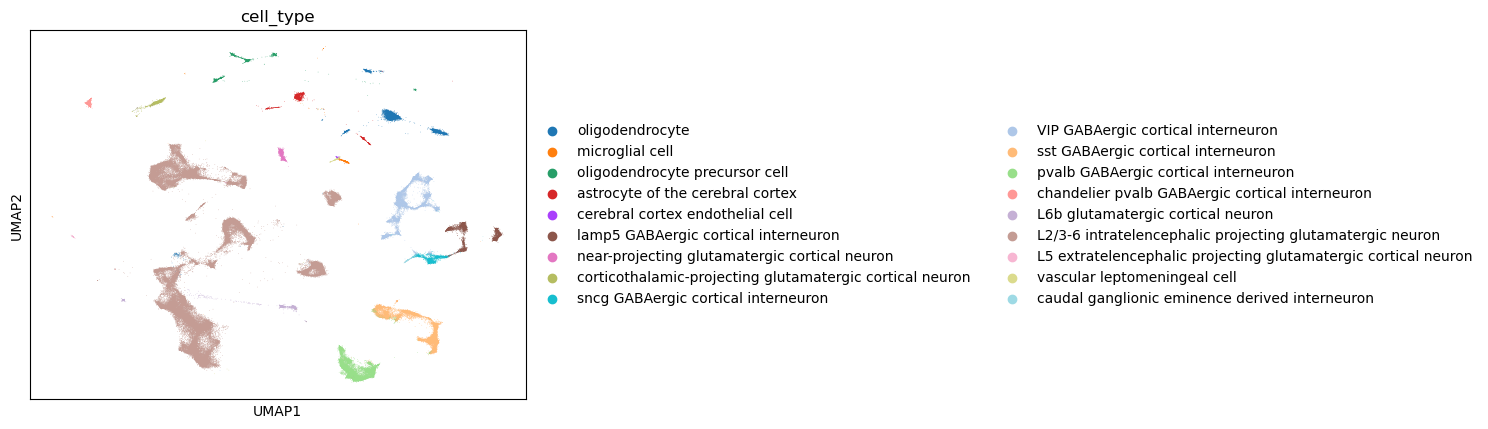

In [19]:
sc.pl.umap(adata1, color='cell_type')

## Map gorilla data to the atlas

In [20]:
_,zs,_ = atlas.map(adata2)
adata2.obsm['X_umap'] = atlas.umap.transform(zs)

100%|██████████| 137/137 [00:00<00:00, 313.69batch/s]


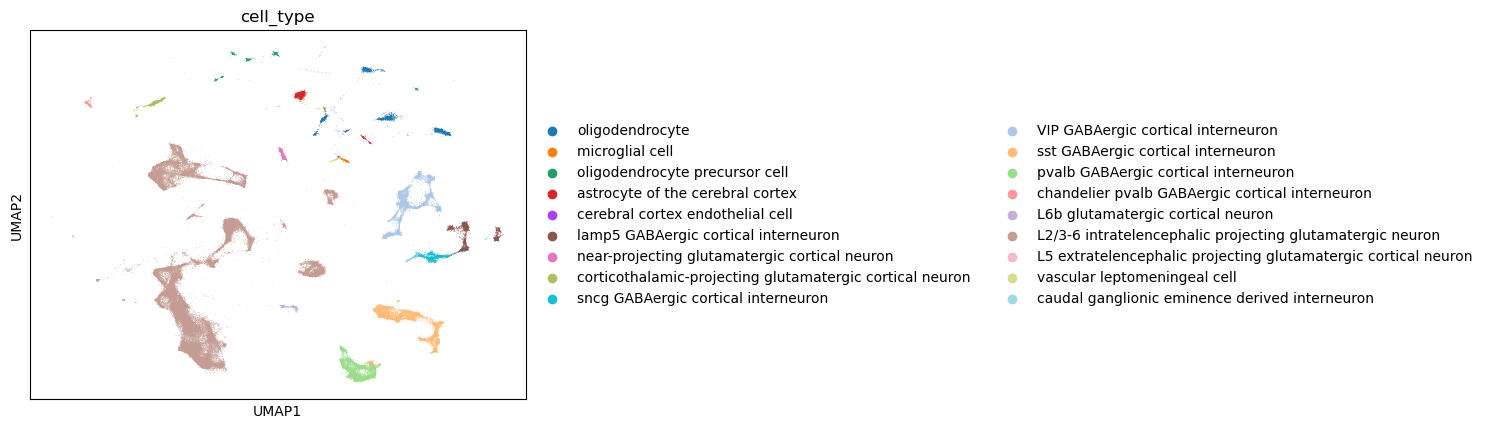

In [21]:
sc.pl.umap(adata2, color='cell_type')